In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [18]:
data_archie = pd.read_csv('data_archie_17-18.csv')

In [19]:
print 'Total data = {}'.format(len(data_archie))

Total data = 755252


In [20]:
data_archie.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755252 entries, 0 to 755251
Data columns (total 18 columns):
transaction_id        755252 non-null int64
created_at            755252 non-null object
updated_at            755252 non-null object
user_id               755226 non-null float64
cluster               755226 non-null object
partner_name          755226 non-null object
fullname              755223 non-null object
customer_number       755252 non-null object
longitude             31110 non-null float64
latitude              31110 non-null float64
operator              755252 non-null object
product_id            755252 non-null int64
product_name          755252 non-null object
product_value         755252 non-null int64
cur_purchase_price    755252 non-null float64
cur_sell_price        755050 non-null float64
status                755252 non-null object
source                38109 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 103.7+ MB


## Data Cleaning

In [21]:
data_archie.isnull().sum()

transaction_id             0
created_at                 0
updated_at                 0
user_id                   26
cluster                   26
partner_name              26
fullname                  29
customer_number            0
longitude             724142
latitude              724142
operator                   0
product_id                 0
product_name               0
product_value              0
cur_purchase_price         0
cur_sell_price           202
status                     0
source                717143
dtype: int64

In [22]:
# Drop unnecessary
data_archie = data_archie.drop(['fullname','longitude','latitude','source'] , 1)

In [23]:
data_archie.head(5)

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
0,1267873,2017-12-10 20:45:51.000000,2017-12-10 20:46:08.000000,24081.0,Banyumas,Lapak Kita,26452811385,Smartfren,34,Smartfren 10.000,10000,10175.0,10225.0,success
1,1267889,2017-12-10 20:45:57.000000,2017-12-10 20:55:06.000000,416.0,Indragiri,Lapak Kita,255814472019,Telkomsel,293,Telkomsel 10.000,10000,9850.0,9900.0,success
2,1267897,2017-12-10 20:46:04.000000,2017-12-10 20:55:13.000000,22658.0,Indragiri,Lapak Kita,256120681743,Telkomsel,294,Telkomsel 20.000,20000,19700.0,19800.0,success
3,1267919,2017-12-10 20:46:12.000000,2017-12-10 20:55:20.000000,24130.0,Indragiri,Lapak Kita,247159394775,Telkomsel,293,Telkomsel 10.000,10000,9850.0,9900.0,success
4,1267928,2017-12-10 20:46:24.000000,2017-12-10 20:55:27.000000,24111.0,Indragiri,Lapak Kita,247153630911,Telkomsel,295,Telkomsel 25.000,25000,24625.0,24750.0,success


In [24]:
data_archie.isnull().sum()

transaction_id          0
created_at              0
updated_at              0
user_id                26
cluster                26
partner_name           26
customer_number         0
operator                0
product_id              0
product_name            0
product_value           0
cur_purchase_price      0
cur_sell_price        202
status                  0
dtype: int64

### user_id

In [25]:
data_archie.loc[data_archie['user_id'].isnull()].head(5)
#data_archie[data_archie['user_id'].isnull()].head(5)

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
5495,7823,2017-10-19 21:14:30.000000,2017-10-19 21:14:30.000000,NaN,NaN,NaN,243834992280,T-Sel MKIOS,202,MKIOS Reguler 10000,10000,10000.0,10000.0,mkios_new
6087,9016,2017-10-23 19:13:43.000000,2017-10-23 19:14:09.000000,NaN,NaN,NaN,135031878969,PLN Prepaid,429,"PLN Prepaid Rp 50,000",50000,0.0,0.0,success
26884,6085,2017-10-17 17:54:44.000000,2017-10-17 17:55:07.000000,NaN,NaN,NaN,135027052602,PLN Prepaid,430,"PLN Prepaid Rp 100,000",100000,0.0,0.0,success
37172,9046,2017-10-23 20:36:10.000000,2017-10-23 20:37:08.000000,NaN,NaN,NaN,135097350216,PLN Prepaid,187,"PLN Prepaid Rp 20,000",20000,0.0,0.0,success
41750,6701,2017-10-29 21:51:43.000000,2017-10-29 21:51:51.000000,NaN,NaN,NaN,243837310839,Telkomsel,425,Telkomsel Rp 20.000,20000,19900.0,19900.0,success


In [26]:
# Remove 'user_id = Null' from dataframe 
data_archie = data_archie[data_archie['user_id'].notnull()]
#df = df.dropna(how='any',axis=0)

In [29]:
data_archie.user_id = (data_archie['user_id']).astype(int)

In [28]:
#data_archie.isnull().sum()

### cur_sell_price

In [30]:
data_archie.loc[data_archie['cur_sell_price'].isnull()].head(5)

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
11621,1281071,2017-12-12 08:59:00.000000,2017-12-12 08:59:05.000000,3513,Cilacap,Lapak Kita,251534541093,Axis,13,Axis 200.000,200000,0.0,NaN,success
58105,705052,2017-07-05 13:05:02.000000,2017-07-05 13:05:09.000000,2417,Tegal,Lapak Kita,251532607257,Axis,13,Axis 200.000,200000,0.0,NaN,success
61383,703201,2017-07-05 12:16:38.000000,2017-07-05 12:17:07.000000,2417,Tegal,Lapak Kita,251532607248,Axis,13,Axis 200.000,200000,0.0,NaN,success
62567,1339994,2017-12-23 12:13:36.000000,2017-12-23 12:14:08.000000,4179,Cilacap,Lapak Kita,251534325141,Axis,13,Axis 200.000,200000,0.0,NaN,success
63720,707163,2017-07-05 14:02:56.000000,2017-07-05 14:03:07.000000,2417,Tegal,Lapak Kita,251532607215,Axis,13,Axis 200.000,200000,0.0,NaN,success


In [31]:
data_archie = data_archie[data_archie['cur_sell_price'].notnull()]

In [32]:
data_archie.isnull().sum()

transaction_id        0
created_at            0
updated_at            0
user_id               0
cluster               0
partner_name          0
customer_number       0
operator              0
product_id            0
product_name          0
product_value         0
cur_purchase_price    0
cur_sell_price        0
status                0
dtype: int64

In [33]:
data_archie['cur_sell_price'].min()

0.0

In [34]:
(data_archie['cur_sell_price'] == 0.0).sum()

11911

In [35]:
data_archie[data_archie['cur_sell_price'] == 0.0].head()

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status
19,1268058,2017-12-10 20:48:32.000000,2017-12-10 20:48:32.000000,24128,Indragiri,Lapak Kita,255835076388,T-Sel MKIOS,202,MKIOS Reguler 10000,10000,0.0,0.0,mkios_new
241,10117,2017-11-01 00:23:45.000000,2017-11-01 00:23:45.000000,16565,Batam,Golden Technology,247161197601,T-Sel MKIOS,206,MKIOS Reguler 20000,20000,0.0,0.0,mkios_new
274,1268119,2017-12-10 18:57:38.000000,2017-12-10 18:57:38.000000,24240,Banyumas,Lapak Kita,243680107839,T-Sel MKIOS,206,MKIOS Reguler 20000,20000,0.0,0.0,mkios_new
283,10119,2017-11-01 00:25:18.000000,2017-11-01 00:25:18.000000,16429,Batam,Golden Technology,255816851505,T-Sel MKIOS,199,MKIOS Reguler 5000,5000,0.0,0.0,mkios_new
284,10121,2017-11-01 00:27:27.000000,2017-11-01 00:27:27.000000,16103,Batam,Golden Technology,244087850073,T-Sel MKIOS,217,MKIOS Data 100000,100000,0.0,0.0,mkios_new


In [36]:
data_archie = data_archie[data_archie.cur_sell_price != 0.0]

In [37]:
(data_archie['cur_sell_price'] == 0.0).sum()

0

In [38]:
(data_archie['cur_purchase_price'] == 0.0).sum()

32804

In [39]:
data_archie = data_archie[data_archie.cur_purchase_price != 0.0]

In [40]:
print 'Total new data = {}'.format(len(data_archie))

Total new data = 710309


## Exploratory Data

In [41]:
data_archie.columns.values

array(['transaction_id', 'created_at', 'updated_at', 'user_id', 'cluster',
       'partner_name', 'customer_number', 'operator', 'product_id',
       'product_name', 'product_value', 'cur_purchase_price',
       'cur_sell_price', 'status'], dtype=object)

In [42]:
data_archie.created_at = pd.to_datetime(data_archie['created_at']).dt.date
data_archie.updated_at = pd.to_datetime(data_archie['updated_at']).dt.date
data_archie.created_at.head(5)

0    2017-12-10
1    2017-12-10
2    2017-12-10
3    2017-12-10
4    2017-12-10
Name: created_at, dtype: object

### Note: Harga cur_sell_price dari sebuah product_name  itu berbeda sesuai cluster dan partner 

In [33]:
#(data_archie.loc[data_archie['cur_sell_price'] == 0.0])['product_name'].unique()
#(data_archie.loc[data_archie['cur_sell_price'].isnull()])['product_name'].unique()
#data_archie.loc[(data_archie['product_name'] == 'Axis 200.000') & (data_archie['cur_sell_price'].notnull())]
#(data_archie['product_name'] == 'XL 300.000') & (data_archie['cur_sell_price'].notnull())).sum()

#((data_archie['product_name'] == 'XL 30.000') & (data_archie['cur_sell_price'].notnull())).sum()
#(data_archie.loc[data_archie['cur_sell_price'].isnull()])['partner_name'].unique()
#data_archie.loc[(data_archie['product_name'] == 'XL 30.000') & (data_archie['cur_sell_price'].isnull())].head()
#data_archie.loc[(data_archie['cluster'] == 'Cilacap') & (data_archie['partner_name'] == 'Lapak Kita') & (data_archie['product_name'] == 'XL 30.000') & (data_archie['cur_sell_price'].notnull())]

#data_archie['cur_sell_price'] = data_archie.groupby(['cluster', 'partner_name', 'product_name'], sort=False)['cur_sell_price'].apply(lambda x: x.ffill().bfill())
#data_archie[''] = data_archie.set_index(['cluster', 'partner_name', 'product_name']).cur_sell_price.fillna(data_archie.set_index(['cluster', 'partner_name', 'product_name']).cur_sell_price).reset_index()

In [43]:
# New dataframe
df = data_archie.copy()

In [44]:
# Checking transaction status
df['status'].unique()

array(['success', 'failed', 'refunded', 'mkios_new', 'canceled', 'cancel',
       'refund', 'failed_payment', 'new'], dtype=object)

In [45]:
#Remove failed transaction from dataframe 
status = ['failed', 'refunded', 'canceled', 'cancel', 'refund', 'failed_payment', 'new']

for i in status:
    df = df[df['status'] != i]

In [46]:
df['status'].unique()

array(['success', 'mkios_new'], dtype=object)

In [47]:
# Count the profit for every transaction
# Save the result to new column 'margin_val'
df['margin_val'] =   df['cur_sell_price'] - df['cur_purchase_price']

In [48]:
df['margin_val'].min()

-1500.0

In [49]:
(df.loc[df['margin_val'] < 0]).head()

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status,margin_val
141,33395,2017-12-10,2017-12-10,4660,Lampung,Golden Technology,264803994807,Smartfren,38,Smartfren 60.000,60000,60000.0,59500.0,success,-500.0
912,33732,2017-12-11,2017-12-11,15746,Batam,Golden Technology,257933428338,XL,178,XL 100.000,100000,100000.0,99000.0,success,-1000.0
4842,33658,2017-12-11,2017-12-11,15746,Batam,Golden Technology,257924208384,XL,178,XL 100.000,100000,100000.0,99000.0,success,-1000.0
5128,33659,2017-12-11,2017-12-11,15746,Batam,Golden Technology,257924208384,XL,176,XL 50.000,50000,50000.0,49700.0,success,-300.0
5966,34229,2017-12-11,2017-12-11,16362,Batam,Golden Technology,2686099197564,3,165,Tri 50.000,50000,50000.0,49875.0,success,-125.0


In [50]:
df2 = df.copy()

In [51]:
(df['margin_val'] < 0).sum()

305

In [52]:
df = df[df['margin_val'] > 0]

In [53]:
(df['margin_val'] < 0).sum()

0

In [54]:
df.head()

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status,margin_val
0,1267873,2017-12-10,2017-12-10,24081,Banyumas,Lapak Kita,26452811385,Smartfren,34,Smartfren 10.000,10000,10175.0,10225.0,success,50.0
1,1267889,2017-12-10,2017-12-10,416,Indragiri,Lapak Kita,255814472019,Telkomsel,293,Telkomsel 10.000,10000,9850.0,9900.0,success,50.0
2,1267897,2017-12-10,2017-12-10,22658,Indragiri,Lapak Kita,256120681743,Telkomsel,294,Telkomsel 20.000,20000,19700.0,19800.0,success,100.0
3,1267919,2017-12-10,2017-12-10,24130,Indragiri,Lapak Kita,247159394775,Telkomsel,293,Telkomsel 10.000,10000,9850.0,9900.0,success,50.0
4,1267928,2017-12-10,2017-12-10,24111,Indragiri,Lapak Kita,247153630911,Telkomsel,295,Telkomsel 25.000,25000,24625.0,24750.0,success,125.0


In [55]:
# Group the dataframe by user_id
aggs = {}
aggs['transaction_id'] = 'count'
aggs['created_at'] = ['min', 'max']
aggs['cluster'] = lambda x:x.iloc[0]
aggs['partner_name'] = lambda x:x.iloc[0]
aggs['cur_sell_price'] = 'sum'
aggs['margin_val'] = 'sum'

df_final = df.groupby('user_id', as_index=False).agg(aggs)

print aggs

{'partner_name': <function <lambda> at 0x114177488>, 'created_at': ['min', 'max'], 'margin_val': 'sum', 'cur_sell_price': 'sum', 'cluster': <function <lambda> at 0x114177410>, 'transaction_id': 'count'}


In [56]:
#New columns' name
df_final.columns = ['user_id','partner_name', 'first_trx', 'last_trx', 'total_profit', 'monetary', 'cluster', 'frequency']

In [57]:
df_final.head(5)

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency
0,17,Lapak Kita,2017-08-14,2017-11-22,3045.0,760508.0,Indragiri,52
1,59,Lapak Kita,2017-07-01,2017-07-01,50.0,9900.0,Indragiri,1
2,60,Lapak Kita,2017-07-01,2017-07-15,4250.0,840500.0,Indragiri,70
3,61,Lapak Kita,2017-07-12,2017-12-20,10875.0,6524400.0,Indragiri,98
4,63,Jawa Pos,2017-08-11,2017-11-02,250.0,51650.0,Cirebon,4


In [58]:
# Checking the result
df.loc[df['user_id'] == 63]

,transaction_id,created_at,updated_at,user_id,cluster,partner_name,customer_number,operator,product_id,product_name,product_value,cur_purchase_price,cur_sell_price,status,margin_val
3313,1079845,2017-11-01,2017-11-01,63,Cirebon,Jawa Pos,263355140451,XL,170,XL 5.000,5000,5650.0,5675.0,success,25.0
24128,1083548,2017-11-02,2017-11-02,63,Cirebon,Jawa Pos,3342518331,PLN Prepaid,187,"PLN Prepaid Rp 20,000",20000,20050.0,20150.0,success,100.0
47952,1087137,2017-11-02,2017-11-02,63,Cirebon,Jawa Pos,263355140451,XL,170,XL 5.000,5000,5650.0,5675.0,success,25.0
412021,35266,2017-08-11,2017-09-25,63,Cirebon,Jawa Pos,3342518331,PLN Prepaid,187,"PLN Prepaid Rp 20,000",20000,20050.0,20150.0,success,100.0


In [59]:
# Count the total custumer for every user_id
df_final['total_cust'] = df.groupby('user_id', as_index=False)['customer_number'].nunique()

In [60]:
df_final.head(5)

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency,total_cust
0,17,Lapak Kita,2017-08-14,2017-11-22,3045.0,760508.0,Indragiri,52,22
1,59,Lapak Kita,2017-07-01,2017-07-01,50.0,9900.0,Indragiri,1,1
2,60,Lapak Kita,2017-07-01,2017-07-15,4250.0,840500.0,Indragiri,70,57
3,61,Lapak Kita,2017-07-12,2017-12-20,10875.0,6524400.0,Indragiri,98,79
4,63,Jawa Pos,2017-08-11,2017-11-02,250.0,51650.0,Cirebon,4,3


In [61]:
(df.loc[df['user_id']== 17])['customer_number'].unique()

array(['255816437877', '243826585098', '135055504704', 245800992372,
       243826585098, 268539353682, 255816437877, 135055504704,
       244136155311, 256090901664, '243785205606', '249563237841',
       '246517463607', '255814515225', '247160888238', '244136155311',
       '256090901664', '255789580632', '256130344341', '268539353682',
       258107030301, '244096602156'], dtype=object)

In [62]:
df['operator'].unique()

array(['Smartfren', 'Telkomsel', 'PLN Prepaid', 'XL', 'Indosat', '3',
       'BPJS', 'Axis', 'PLN Postpaid', 'Telkom', 'PDAM'], dtype=object)

In [63]:
df_final.last_trx.max()

datetime.date(2017, 12, 31)

In [64]:
import datetime as dt

now = dt.date(2018,1,1)

In [65]:
# Checking the recency for every user
# recency is measurement of the time elapsed since the last purchase was made by a customer
df_final['recency'] = (now - df_final['last_trx']).dt.days

In [66]:
# How long the costumer using our system
# {now - first puchase}
df_final['join_days'] = (now - df_final['first_trx']).dt.days

In [67]:
df_final.head()

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency,total_cust,recency,join_days
0,17,Lapak Kita,2017-08-14,2017-11-22,3045.0,760508.0,Indragiri,52,22,40,140
1,59,Lapak Kita,2017-07-01,2017-07-01,50.0,9900.0,Indragiri,1,1,184,184
2,60,Lapak Kita,2017-07-01,2017-07-15,4250.0,840500.0,Indragiri,70,57,170,184
3,61,Lapak Kita,2017-07-12,2017-12-20,10875.0,6524400.0,Indragiri,98,79,12,173
4,63,Jawa Pos,2017-08-11,2017-11-02,250.0,51650.0,Cirebon,4,3,60,143


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
x = ['monetary', 'frequency', 'recency','total_cust', 'join_days', 'total_profit']
data = df_final[x]
data.head()

,monetary,frequency,recency,total_cust,join_days,total_profit
0,760508.0,52,40,22,140,3045.0
1,9900.0,1,184,1,184,50.0
2,840500.0,70,170,57,184,4250.0
3,6524400.0,98,12,79,173,10875.0
4,51650.0,4,60,3,143,250.0


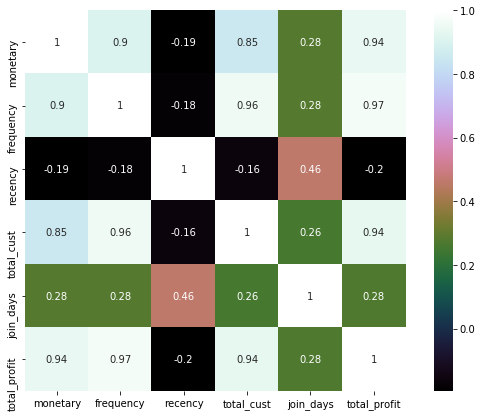

In [70]:
# Correlation heatmap in dataset
# Positive correlation (+1.00): If one variable increases the other also increases and when one variable decreases the other also decreases
# Negative correlation (-1.00) : If one variable increases as the other decreases, and vice versa.
# 0.00 indicates no correlation between two variables 

x = ['monetary', 'frequency', 'recency','total_cust', 'join_days', 'total_profit']
data = df_final[x]
correlation = data.corr()  
plt.figure(figsize=(10, 7))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [71]:
# Findings:
# - monetary has positive corr with total_profit, total_cust and frequency, means that we don't need to keep/ use both of features
# - also have same corr value toward others variable 
# - recency has good corr towards others

## Predictions

### 1. Scoreboard

In [72]:
features = ['recency', 'monetary', 'total_profit', 'frequency', 'join_days']

In [73]:
quantiles = df_final[features].quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'frequency': {0.25: 8.0, 0.5: 34.5, 0.75: 134.0},
 'join_days': {0.25: 48.0, 0.5: 77.0, 0.75: 178.0},
 'monetary': {0.25: 145206.25, 0.5: 747800.0, 0.75: 3173771.75},
 'recency': {0.25: 1.0, 0.5: 10.0, 0.75: 54.0},
 'total_profit': {0.25: 775.0, 0.5: 3296.0, 0.75: 11607.5}}

In [74]:
df_final[features].describe()

,recency,monetary,total_profit,frequency,join_days
count,4322.000000,4.322000e+03,4322.000000,4322.000000,4322.000000
mean,37.898195,3.853665e+06,13290.460435,150.335724,100.882693
std,50.627406,9.998619e+06,32806.369644,385.287110,63.738276
min,1.000000,2.110000e+03,10.000000,1.000000,1.000000
25%,1.000000,1.452062e+05,775.000000,8.000000,48.000000
50%,10.000000,7.478000e+05,3296.000000,34.500000,77.000000
75%,54.000000,3.173772e+06,11607.500000,134.000000,178.000000
max,184.000000,1.698541e+08,565707.000000,7259.000000,184.000000


In [75]:
# Assign points to variables
# Recency = Good user has lesser recency
def LowValue(x,p,quantiles):
    if x <= quantiles[p][0.25]:
        return 40
    elif x <= quantiles[p][0.50]:
        return 30
    elif x <= quantiles[p][0.75]: 
        return 20
    else:
        return 10

In [76]:
# Good user has higher frequency, monetary, total_profit, total_cust
def HighValue(x,p,quantiles):
    if x <= quantiles[p][0.25]:
        return 10
    elif x <= quantiles[p][0.50]:
        return 20
    elif x <= quantiles[p][0.75]: 
        return 30
    else:
        return 40

In [77]:
df_final['R'] = df_final['recency'].apply(LowValue, args=('recency',quantiles,))
df_final['F'] = df_final['frequency'].apply(HighValue, args=('frequency',quantiles,))
df_final['M'] = df_final['monetary'].apply(HighValue, args=('monetary',quantiles,))
df_final['P'] = df_final['total_profit'].apply(HighValue, args=('total_profit',quantiles,))
#df_final['C'] = df_final['total_cust'].apply(HighValue, args=('total_cust',quantiles,))
df_final['J'] = df_final['join_days'].apply(HighValue, args=('join_days',quantiles,))

In [78]:
df_final['Scorepoints'] = df_final.R + df_final.F + df_final.M + df_final.P + df_final.J

In [79]:
df_final.head()

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency,total_cust,recency,join_days,R,F,M,P,J,Scorepoints
0,17,Lapak Kita,2017-08-14,2017-11-22,3045.0,760508.0,Indragiri,52,22,40,140,20,30,30,20,30,130
1,59,Lapak Kita,2017-07-01,2017-07-01,50.0,9900.0,Indragiri,1,1,184,184,10,10,10,10,40,80
2,60,Lapak Kita,2017-07-01,2017-07-15,4250.0,840500.0,Indragiri,70,57,170,184,10,30,30,30,40,140
3,61,Lapak Kita,2017-07-12,2017-12-20,10875.0,6524400.0,Indragiri,98,79,12,173,20,30,40,30,30,150
4,63,Jawa Pos,2017-08-11,2017-11-02,250.0,51650.0,Cirebon,4,3,60,143,10,10,10,10,30,70


In [80]:
# Scorepoints range is fro 4 - 200 points 
(df_final[df_final['Scorepoints'] == 200]).head()

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency,total_cust,recency,join_days,R,F,M,P,J,Scorepoints
54,241,Lapak Kita,2017-07-05,2017-12-31,14200.0,3804850.0,Indragiri,176,85,1,180,40,40,40,40,40,200
61,251,Lapak Kita,2017-07-06,2017-12-31,13275.0,3651850.0,Indragiri,142,95,1,179,40,40,40,40,40,200
70,276,Lapak Kita,2017-07-02,2017-12-31,19275.0,7553450.0,Indragiri,178,129,1,183,40,40,40,40,40,200
120,369,Lapak Kita,2017-07-01,2017-12-31,170600.0,57229168.0,Indragiri,1790,851,1,184,40,40,40,40,40,200
124,381,Lapak Kita,2017-07-02,2017-12-31,88285.0,25395676.0,Indragiri,644,363,1,183,40,40,40,40,40,200


In [81]:
(df_final[df_final['Scorepoints'] == 160]).head()

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency,total_cust,recency,join_days,R,F,M,P,J,Scorepoints
13,85,Lapak Kita,2017-07-02,2017-12-28,3875.0,1360150.0,Indragiri,40,13,4,183,30,30,30,30,40,160
15,87,Lapak Kita,2017-11-08,2017-12-30,11634.0,4451870.0,Indragiri,98,80,2,54,30,30,40,40,20,160
38,189,Lapak Kita,2017-07-01,2017-08-28,11800.0,3879300.0,Indragiri,98,78,126,184,10,30,40,40,40,160
42,199,Lapak Kita,2017-10-23,2017-11-13,19264.0,4498875.0,Indragiri,207,144,49,70,20,40,40,40,20,160
45,205,Lapak Kita,2017-07-01,2017-08-19,13300.0,2632900.0,Indragiri,237,96,135,184,10,40,30,40,40,160


In [82]:
(df_final[df_final['R'] == 10]).head()

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency,total_cust,recency,join_days,R,F,M,P,J,Scorepoints
1,59,Lapak Kita,2017-07-01,2017-07-01,50.0,9900.0,Indragiri,1,1,184,184,10,10,10,10,40,80
2,60,Lapak Kita,2017-07-01,2017-07-15,4250.0,840500.0,Indragiri,70,57,170,184,10,30,30,30,40,140
4,63,Jawa Pos,2017-08-11,2017-11-02,250.0,51650.0,Cirebon,4,3,60,143,10,10,10,10,30,70
5,65,Lapak Kita,2017-07-01,2017-07-31,8800.0,2592200.0,Indragiri,64,55,154,184,10,30,30,30,40,140
6,66,Lapak Kita,2017-07-16,2017-08-05,2050.0,439050.0,Indragiri,26,23,149,169,10,20,20,20,30,100


In [83]:
(df_final[df_final['Scorepoints'] == 150]).head()

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency,total_cust,recency,join_days,R,F,M,P,J,Scorepoints
3,61,Lapak Kita,2017-07-12,2017-12-20,10875.0,6524400.0,Indragiri,98,79,12,173,20,30,40,30,30,150
16,91,Lapak Kita,2017-07-01,2017-09-17,9250.0,1826500.0,Indragiri,185,118,106,184,10,40,30,30,40,150
22,112,Lapak Kita,2017-07-01,2017-08-22,6675.0,1321650.0,Indragiri,164,67,132,184,10,40,30,30,40,150
33,172,Lapak Kita,2017-07-01,2017-08-19,7950.0,4351050.0,Indragiri,79,53,135,184,10,30,40,30,40,150
39,191,Lapak Kita,2017-07-08,2017-12-28,9700.0,2132400.0,Indragiri,75,55,4,177,30,30,30,30,30,150


In [84]:
# Labelling the user
def label_cust(row):
    if row['Scorepoints'] > 150:
        label = 'Good'
    elif row['Scorepoints'] == 150 and row['recency'] <= 90:
        label = 'Good'
    else:
        label = 'Bad'
    return label

df_final['Qclass'] = df_final.apply(label_cust, axis=1)

In [85]:
df_final.head()

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency,total_cust,recency,join_days,R,F,M,P,J,Scorepoints,Qclass
0,17,Lapak Kita,2017-08-14,2017-11-22,3045.0,760508.0,Indragiri,52,22,40,140,20,30,30,20,30,130,Bad
1,59,Lapak Kita,2017-07-01,2017-07-01,50.0,9900.0,Indragiri,1,1,184,184,10,10,10,10,40,80,Bad
2,60,Lapak Kita,2017-07-01,2017-07-15,4250.0,840500.0,Indragiri,70,57,170,184,10,30,30,30,40,140,Bad
3,61,Lapak Kita,2017-07-12,2017-12-20,10875.0,6524400.0,Indragiri,98,79,12,173,20,30,40,30,30,150,Good
4,63,Jawa Pos,2017-08-11,2017-11-02,250.0,51650.0,Cirebon,4,3,60,143,10,10,10,10,30,70,Bad


## 2. K-Means & RFM

In [86]:
features2 = ['monetary', 'frequency', 'recency']

In [87]:
df_final[features2].describe()

,monetary,frequency,recency
count,4.322000e+03,4322.000000,4322.000000
mean,3.853665e+06,150.335724,37.898195
std,9.998619e+06,385.287110,50.627406
min,2.110000e+03,1.000000,1.000000
25%,1.452062e+05,8.000000,1.000000
50%,7.478000e+05,34.500000,10.000000
75%,3.173772e+06,134.000000,54.000000
max,1.698541e+08,7259.000000,184.000000


In [88]:
# Squre Root
df_sqr = df_final[features2]
sqrt_val = df_sqr.apply(np.sqrt)
sqrt_val.tail()

,monetary,frequency,recency
4317,238.537209,2.000000,1.0
4318,297.657521,1.732051,1.0
4319,232.271393,1.414214,1.0
4320,225.831796,1.732051,1.0
4321,223.941957,1.000000,1.0


In [89]:
from sklearn.preprocessing import StandardScaler

matrix = sqrt_val.as_matrix()
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: ' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

('variables mean values: ', array([1344.08139276,    8.67676389,    4.73943339]))


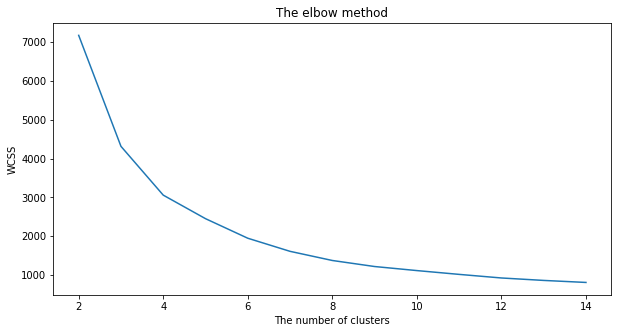

In [90]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2,15):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(scaled_matrix)
 wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(2,15), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.7086957626197009)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.647730682442655)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.615224838742559)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.6069226507036415)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.5854214552695409)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.5852342855197508)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.5706466184557307)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.569426567816741)


In [96]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.492


In [98]:
centers = kmeans.cluster_centers_
centers

array([[ 1.51539641,  1.50565783, -0.71287031],
       [-0.40023485, -0.39766277,  0.18827783]])

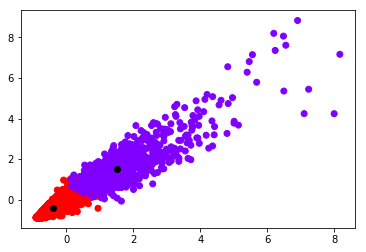

In [99]:
plt.scatter(scaled_matrix[:,0],scaled_matrix[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(centers[:,0] ,centers[:,1], color='black') 

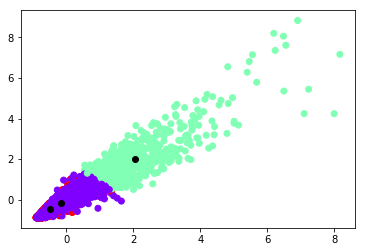

In [101]:
n_clusters = 3
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)

centers = kmeans.cluster_centers_

plt.scatter(scaled_matrix[:,0],scaled_matrix[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(centers[:,0] ,centers[:,1], color='black') 

In [103]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['number of customers']).T

,0,2,1
number of customers,2168,1606,548


In [ ]:
#plt.scatter(X_scale[:,0],X_scale[:,1], c=kmeans.labels_, cmap='rainbow')  
#plt.scatter(centers[:,0] ,centers[:,1], color='black') 

In [104]:
# Without Square Root
X = df_final[features2]
X = X.values
X

array([[7.60508e+05, 5.20000e+01, 4.00000e+01],
       [9.90000e+03, 1.00000e+00, 1.84000e+02],
       [8.40500e+05, 7.00000e+01, 1.70000e+02],
       ...,
       [5.39500e+04, 2.00000e+00, 1.00000e+00],
       [5.10000e+04, 3.00000e+00, 1.00000e+00],
       [5.01500e+04, 1.00000e+00, 1.00000e+00]])

In [105]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

cluster_range = range (1,10)
cluster_errors = []

for cluster in cluster_range:
    clusters = KMeans(cluster)
    clusters.fit(X_scale)
    cluster_errors.append(clusters.inertia_ )

In [106]:
df_cluster = pd.DataFrame({"cluster" : cluster_range, "cluster_error" : cluster_errors})
df_cluster

,cluster,cluster_error
0,1,12966.000000
1,2,8199.121501
2,3,4776.710425
3,4,2825.564358
4,5,2154.811668
5,6,1662.852718
6,7,1379.730256
7,8,1189.406737
8,9,1020.414486


Text(0,0.5,'cluster errors')

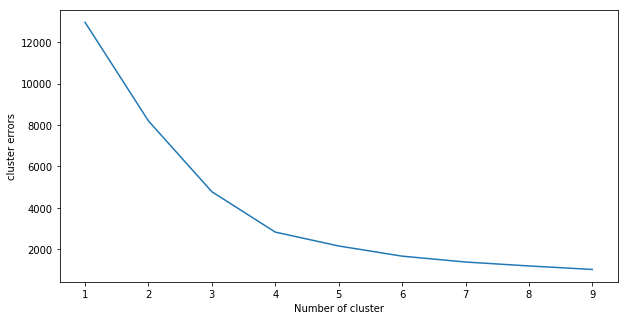

In [107]:
plt.figure(figsize=(10,5))
plt.plot(df_cluster.cluster, df_cluster.cluster_error)
plt.xlabel('Number of cluster')
plt.ylabel('cluster errors')

In [108]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X_scale)
y_kmeans = kmeans.predict(X_scale)
y_kmeans

array([0, 2, 2, ..., 0, 0, 0], dtype=int32)

In [109]:
centers = kmeans.cluster_centers_
centers

array([[-0.09786562, -0.09749308, -0.43533224],
       [ 4.21000711,  4.04110638, -0.64428319],
       [-0.27788865, -0.25292744,  1.7927954 ]])

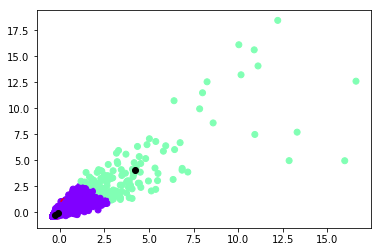

In [110]:
plt.scatter(X_scale[:,0],X_scale[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(centers[:,0] ,centers[:,1], color='black') 

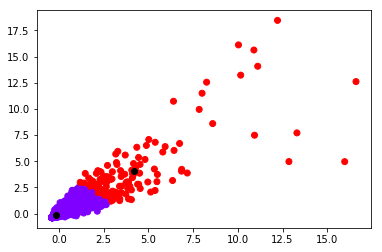

In [111]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X_scale)
y_kmeans = kmeans.predict(X_scale)

centers = kmeans.cluster_centers_

plt.scatter(X_scale[:,0],X_scale[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(centers[:,0] ,centers[:,1], color='black') 

In [112]:
pd.DataFrame(pd.Series(y_kmeans).value_counts(), columns = ['number of customers']).T

,0,1
number of customers,4187,135


In [113]:
df_final['cluster'] = y_kmeans

In [116]:
df_final[df_final['cluster'] == 0].head()

,user_id,partner_name,first_trx,last_trx,total_profit,monetary,cluster,frequency,total_cust,recency,join_days,R,F,M,P,J,Scorepoints,Qclass
0,17,Lapak Kita,2017-08-14,2017-11-22,3045.0,760508.0,0,52,22,40,140,20,30,30,20,30,130,Bad
1,59,Lapak Kita,2017-07-01,2017-07-01,50.0,9900.0,0,1,1,184,184,10,10,10,10,40,80,Bad
2,60,Lapak Kita,2017-07-01,2017-07-15,4250.0,840500.0,0,70,57,170,184,10,30,30,30,40,140,Bad
3,61,Lapak Kita,2017-07-12,2017-12-20,10875.0,6524400.0,0,98,79,12,173,20,30,40,30,30,150,Good
4,63,Jawa Pos,2017-08-11,2017-11-02,250.0,51650.0,0,4,3,60,143,10,10,10,10,30,70,Bad


## 3. K-Means 

In [117]:
features3 = ['monetary', 'recency', 'join_days']
features4 = ['frequency', 'recency','join_days']

In [118]:
ft = df_final[features3]
ft = ft.values

scaler = StandardScaler()
ft_scale = scaler.fit_transform(ft)

cluster_range = range (1,10)
cluster_errors = []

for cluster in cluster_range:
    clusters = KMeans(cluster)
    clusters.fit(ft_scale)
    cluster_errors.append(clusters.inertia_ )

df_cluster = pd.DataFrame({"cluster" : cluster_range, "cluster_error" : cluster_errors})

Text(0,0.5,'cluster errors')

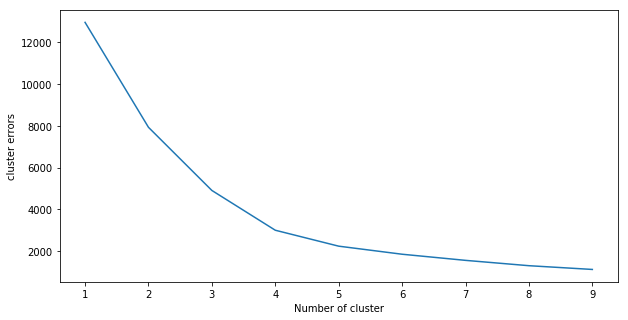

In [119]:
plt.figure(figsize=(10,5))
plt.plot(df_cluster.cluster, df_cluster.cluster_error)
plt.xlabel('Number of cluster')
plt.ylabel('cluster errors')

In [121]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(ft_scale)
y_kmeans = kmeans.predict(ft_scale)
y_kmeans

centers = kmeans.cluster_centers_
centers

array([[-0.2606063 , -0.40691872, -0.81683047],
       [-0.26546475,  1.74447221,  1.0236094 ],
       [ 0.85664147, -0.55685197,  1.05671763]])

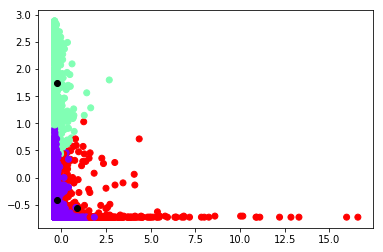

In [122]:
plt.scatter(ft_scale[:,0],ft_scale[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(centers[:,0] ,centers[:,1], color='black') 